In [3]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

from data_functions import *
from metric_functions import *
from helper_functions import *
from models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
dataset = load_data("./train")
labels = dataset.classes
train, val = trai_val_split(dataset, 0.8)

In [3]:
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=64, shuffle=True)

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

## Augumentacja danych

In [5]:
iters = [i for i in range(1, 11)]

### Odwracanie obrazków

In [6]:
transform_flip = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomVerticalFlip(0.5),
     transforms.RandomRotation(24),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_flip = load_data("./train", transform=transform_flip)
train_flip, val_flip = trai_val_split(dataset_flip, 0.8)

In [7]:
net_flip = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_flip, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_flip, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_flip.parameters(), lr=0.001)

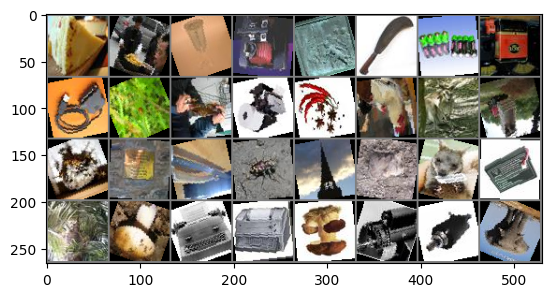

In [8]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [8]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_flip, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [02:58<00:00, 17.85s/it]


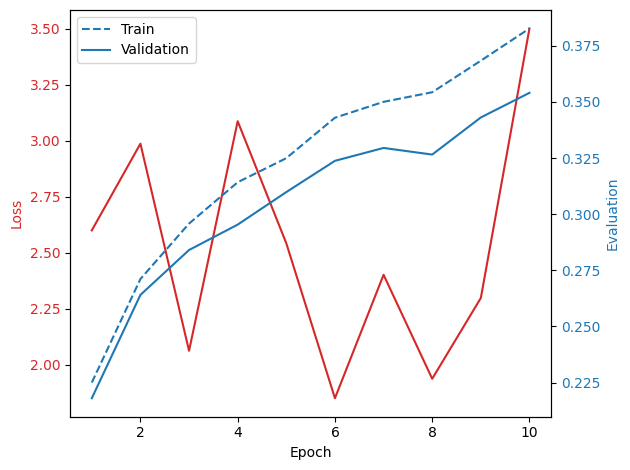

In [9]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

- Lepszy model pod względem przetrenowania w porównaniu do startowego
- Lepsze uogólnianie wzorców

### Przekształcanie kolorów

In [11]:
transform_color = transforms.Compose(
    [transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_color = load_data("./train", transform=transform_color)
train_color, val_color = trai_val_split(dataset_color, 0.8)

In [12]:
net_color = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_color, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_color, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_color.parameters(), lr=0.001)

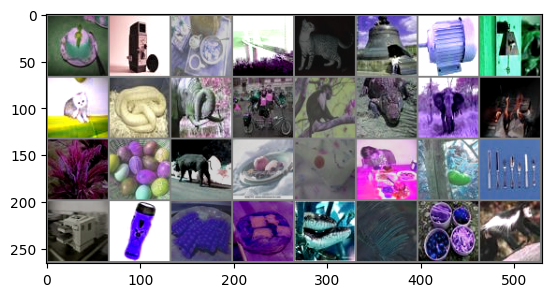

In [13]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [14]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_color, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [03:47<00:00, 22.79s/it]


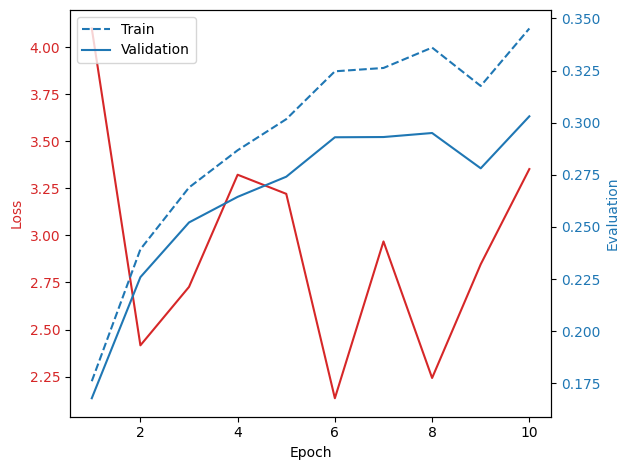

In [15]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

### Przycinanie obrazków

In [6]:
transform_crop = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_crop = load_data("./train", transform=transform_crop)
train_crop, val_crop = trai_val_split(dataset_crop, 0.8)

In [7]:
net_crop = CustomNet(num_classes=len(labels), input_size=32).to(device)

train_loader = torch.utils.data.DataLoader(train_crop, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_crop, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_crop.parameters(), lr=0.001)

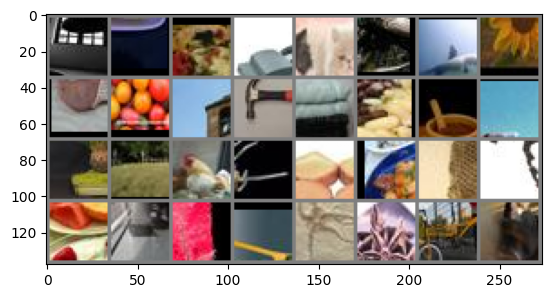

In [12]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [8]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_crop, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [02:20<00:00, 14.03s/it]


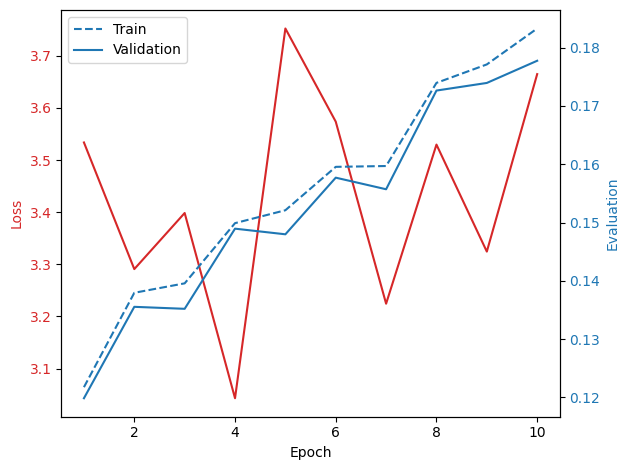

In [9]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

- Pogorszenie wyników
- Model nie jest przetrenowany

### Wymazywanie obrazków

In [10]:
transform_erase = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomErasing(0.5),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_erase = load_data("./train", transform=transform_erase)
train_erase, val_erase = trai_val_split(dataset_erase, 0.8)

In [11]:
net_erase = CustomNet(num_classes=len(labels)).to(device)

train_loader = torch.utils.data.DataLoader(train_erase, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_erase, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_erase.parameters(), lr=0.001)

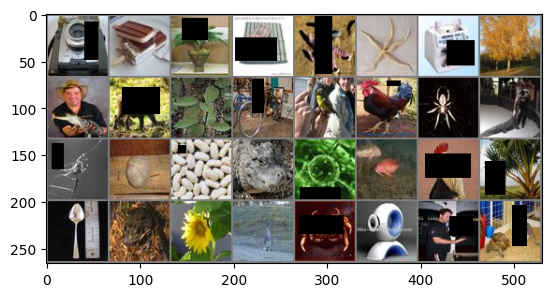

In [12]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [13]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_erase, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [02:55<00:00, 17.52s/it]


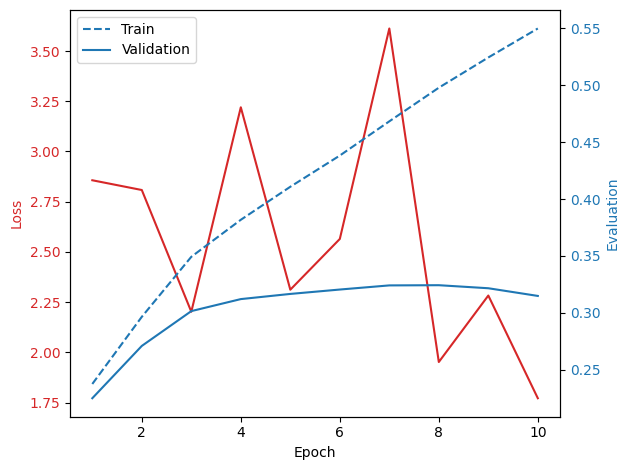

In [14]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

- Model mocno przetrenowany
- Trzeba zdecydowanie zmiejszyć współczynnik wycinania

### Blur 

In [15]:
transform_blur = transforms.Compose(
    [transforms.GaussianBlur(3),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_blur = load_data("./train", transform=transform_blur)
train_blur, val_blur = trai_val_split(dataset_blur, 0.8)

In [16]:
net_blur = CustomNet(num_classes=len(labels)).to(device) 

train_loader = torch.utils.data.DataLoader(train_blur, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_blur, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_blur.parameters(), lr=0.001)

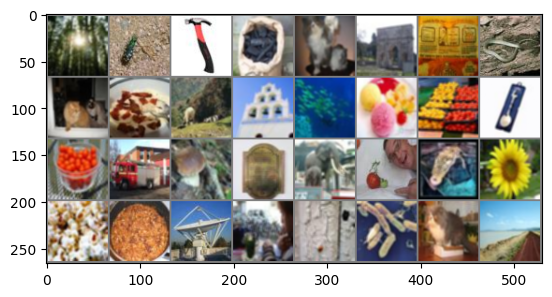

In [17]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [18]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net_blur, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [04:16<00:00, 25.61s/it]


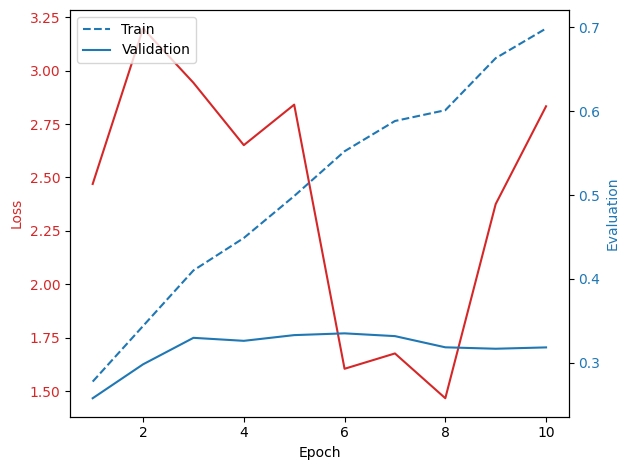

In [19]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

- Model zbyt przetrenowany

### Finałowa transformacja

- Mniejsza transformacja kolorów
- Zwiększenie wielkości obrazka po odcięciu
- Mniejsze wycinanie obszarów
- Zmniejszenie efektu GaussianBlur

In [5]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomVerticalFlip(0.5),
     transforms.RandomRotation(24),
     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
     transforms.RandomCrop(48, padding=4),
     transforms.GaussianBlur(1),
     transforms.ToTensor(),
     transforms.RandomErasing(0.2),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = load_data("./train", transform=transform)
train, val = trai_val_split(dataset, 0.8)

In [10]:
net = CustomNet(num_classes=len(labels), input_size=48).to(device)

train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val, batch_size=32, shuffle=True, num_workers=8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

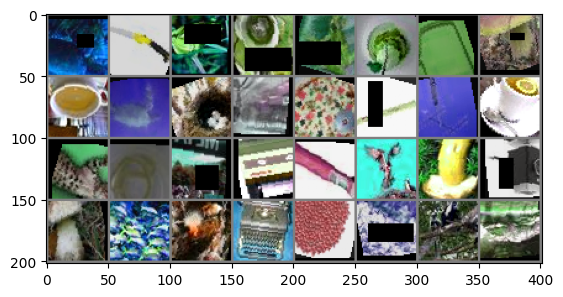

In [19]:
train_batch, train_labels = next(iter(train_loader))
val_batch, val_labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(train_batch))

In [20]:
loss_hist, train_eval_hist, val_eval_hist = train_model(net, train_loader, val_loader, criterion, optimizer, get_accuracy, device, 10)

100%|██████████| 10/10 [05:55<00:00, 35.59s/it]


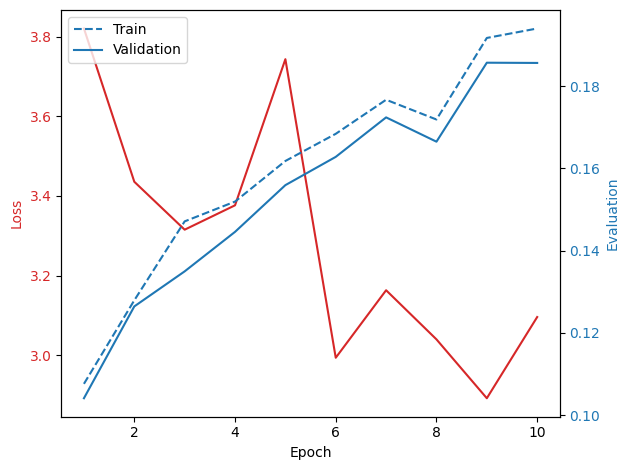

In [21]:
plot_training(iters, loss_hist, train_eval_hist, val_eval_hist)

- Stabilny spadek straty
- Małe przetrenowanie
- Model osiąga słabe wyniki ale można je poprawić większą liczbą iteracji

In [9]:
dataset_path = "./train"
dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True, num_workers=8)

data = next(iter(data_loader))
fast_data = FastDataset(data[0], data[1])
torch.save(fast_data, "final_data.tar")

### Redukcja augumentacji

- Modele trenowane osiągały zbyt słabe wyniki
- Potencjalnie niedotrenowane
- Zredukowanie augumentacji w celu poprawy ogólnych wyników

In [ ]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomVerticalFlip(0.5),
     transforms.RandomRotation(24),
     transforms.ToTensor(),
     transforms.RandomErasing(0.2),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_path = "./train"
dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True, num_workers=8)

data = next(iter(data_loader))
fast_data = FastDataset(data[0], data[1])
torch.save(fast_data, "reduced_data.tar")